In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import numpy as np
import gmaps
import gmaps.datasets as gset
%matplotlib inline

In [2]:
go = pd.read_csv('gobike.csv')

In [3]:
go.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
34848,1173,2019-02-23 20:58:16.9700,2019-02-23 21:17:50.8720,NaN,NaN,37.420000,-121.960000,NaN,NaN,37.400000,-121.930000,4168,Subscriber,1990.0,Male,No
13330,208,2019-02-27 16:27:43.1300,2019-02-27 16:31:11.4740,90.0,Townsend St at 7th St,37.771058,-122.402717,91.0,Berry St at King St,37.771762,-122.398438,6308,Subscriber,NaN,NaN,No
177985,1212,2019-02-01 17:59:26.1760,2019-02-01 18:19:38.9290,10.0,Washington St at Kearny St,37.795393,-122.404770,81.0,Berry St at 4th St,37.775880,-122.393170,5182,Subscriber,1992.0,Male,No
90340,1056,2019-02-16 12:46:09.6710,2019-02-16 13:03:45.9420,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6157,Subscriber,1977.0,Male,No
11835,595,2019-02-27 18:09:51.9440,2019-02-27 18:19:47.9040,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,11.0,Davis St at Jackson St,37.797280,-122.398436,6259,Subscriber,1996.0,Male,No
39017,916,2019-02-23 10:27:19.1090,2019-02-23 10:42:35.9410,58.0,Market St at 10th St,37.776619,-122.417385,25.0,Howard St at 2nd St,37.787522,-122.397405,6547,Subscriber,1991.0,Female,No
29845,631,2019-02-25 06:03:03.4330,2019-02-25 06:13:35.2220,189.0,Genoa St at 55th St,37.839649,-122.271756,181.0,Grand Ave at Webster St,37.811377,-122.265192,6049,Subscriber,1969.0,Male,No
39042,1299,2019-02-23 10:15:30.3050,2019-02-23 10:37:10.1350,377.0,Fell St at Stanyan St,37.771917,-122.453704,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5018,Subscriber,NaN,NaN,No
26064,222,2019-02-25 14:12:49.2780,2019-02-25 14:16:32.0260,176.0,MacArthur BART Station,37.828410,-122.266315,212.0,Mosswood Park,37.824893,-122.260437,5776,Subscriber,1990.0,Male,No
89754,378,2019-02-16 14:45:17.7350,2019-02-16 14:51:35.9450,280.0,San Fernando St at 7th St,37.337122,-121.883215,308.0,San Pedro Square,37.336802,-121.894090,6170,Subscriber,1997.0,Male,Yes


In [4]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Quality Issues

1. Change the start and end time columns to datetime so that they can be used as time on the x-axis.

In [5]:
go['start_time'] = pd.to_datetime(go['start_time'])
go['end_time'] = pd.to_datetime(go['end_time'])

In [6]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### User type vs Age
My initial thought is that older users are less likely to have a subscription than younger users. The graph is hard to read because there are many more subscribers than customers, but there is still an obvious spike in the subscriber count around the age of 30 that is not seen for customers. 

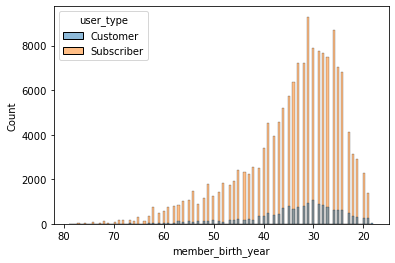

In [7]:
# Member birth year count
ticks = [1939, 1949, 1959, 1969, 1979, 1989, 1999]
labels = ['80', '70', '60', '50', '40', '30', '20']
sb.histplot(data=go, x='member_birth_year', hue='user_type', binrange=(1940, 2001))
plt.xticks(ticks, labels);

### Distribution of Ride Durations
The difference in the number of users made me rethink how I wanted to investigate the data so I began to look at bike usage time and bike use over time. The first thing I wanted to see was the distribution of trip length in seconds.

<AxesSubplot:xlabel='duration_sec', ylabel='Count'>

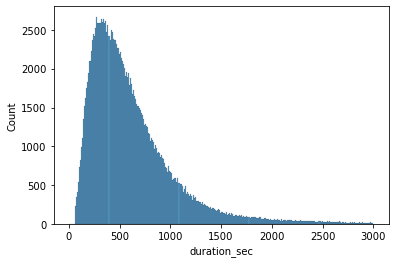

In [8]:
# Plot trip durations in histogram.
sb.histplot(data=go, x='duration_sec', binwidth=10, binrange=(0, 3000))

In [9]:
go['hour'] = go['start_time'].dt.hour
go['day'] = go['start_time'].dt.day

### Distribution of bike use over a 24 hour period.
I next want to understand how people use the bike. This graphs The use of bikes by the hour. It is very evident that it is bimodel. One at 8 o'clock and another at 17, or 5 o'clock. This correlates perfectly with the work day. I will want to investigate bike use one weekdays vs weekends to see if bike use is still bimodal on weekends.

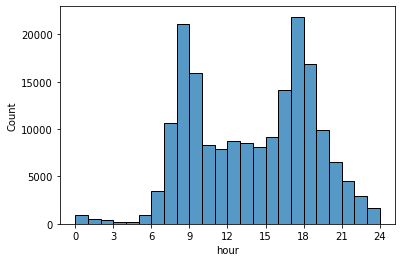

In [10]:
ticks = [0, 3, 6, 9, 12, 15, 18, 21, 24]
sb.histplot(data=go, x='hour', binwidth=1, binrange=(0,24))
plt.xticks(ticks);

## Distance traveled on each trip.
Since there is no column for distance traveled, I used the start and end coordinates to add a new column for distance in (km). This does not take into account actual distance biked, which is why there are so many trips 0km long. they started and ended in the same spot.

In [11]:

con = go.copy()
# I found this code on kite.com and made some changes.
# link: https://www.kite.com/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python
# radius of the Earth
R = 6373.0
# coordinates
con['lat1'] = np.radians(con['start_station_latitude'])
con['lon1'] = np.radians(con['start_station_longitude'])
con['lat2'] = np.radians(con['end_station_latitude'])
con['lon2'] = np.radians(con['end_station_longitude'])

#change in coordinates
con['dlon'] = con['lon2'] - con['lon1']
con['dlat'] = con['lat2'] - con['lat1']

# Haversine formula
con['a'] = np.sin(con['dlat'] / 2)**2 + np.cos(con['lat1']) * np.cos(con['lat2']) * np.sin(con['dlon'] / 2)**2
con['c'] = 2 * np.arctan2(np.sqrt(con['a']), np.sqrt(1 - con['a']))
go['distance_km'] = R * con['c']

This graph shows that the distance between start and end points peaks at around 1km to 1.5km. In addition, there are also a large number of people who take rides that start and end in the same place 

<AxesSubplot:xlabel='distance_km', ylabel='Count'>

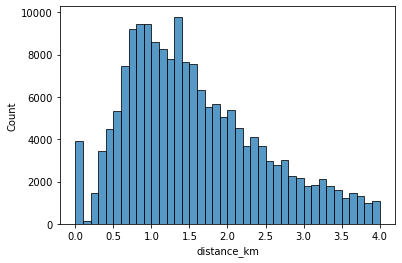

In [12]:
sb.histplot(data=go, x='distance_km', binrange=(0,4), binwidth=0.1)

### Facet Grid of Distance separated by Hours
After the previous Histogram I want to look into the distribution of trip lengths based on each hour of the day. My main pint of interest is if specific hours have spikes in the distance traveled. This again shows that there is a spike in bike use around the commuting hours of the day. It also shows that no matter the time of day, the most common distance ridden is around 1-1.5km.

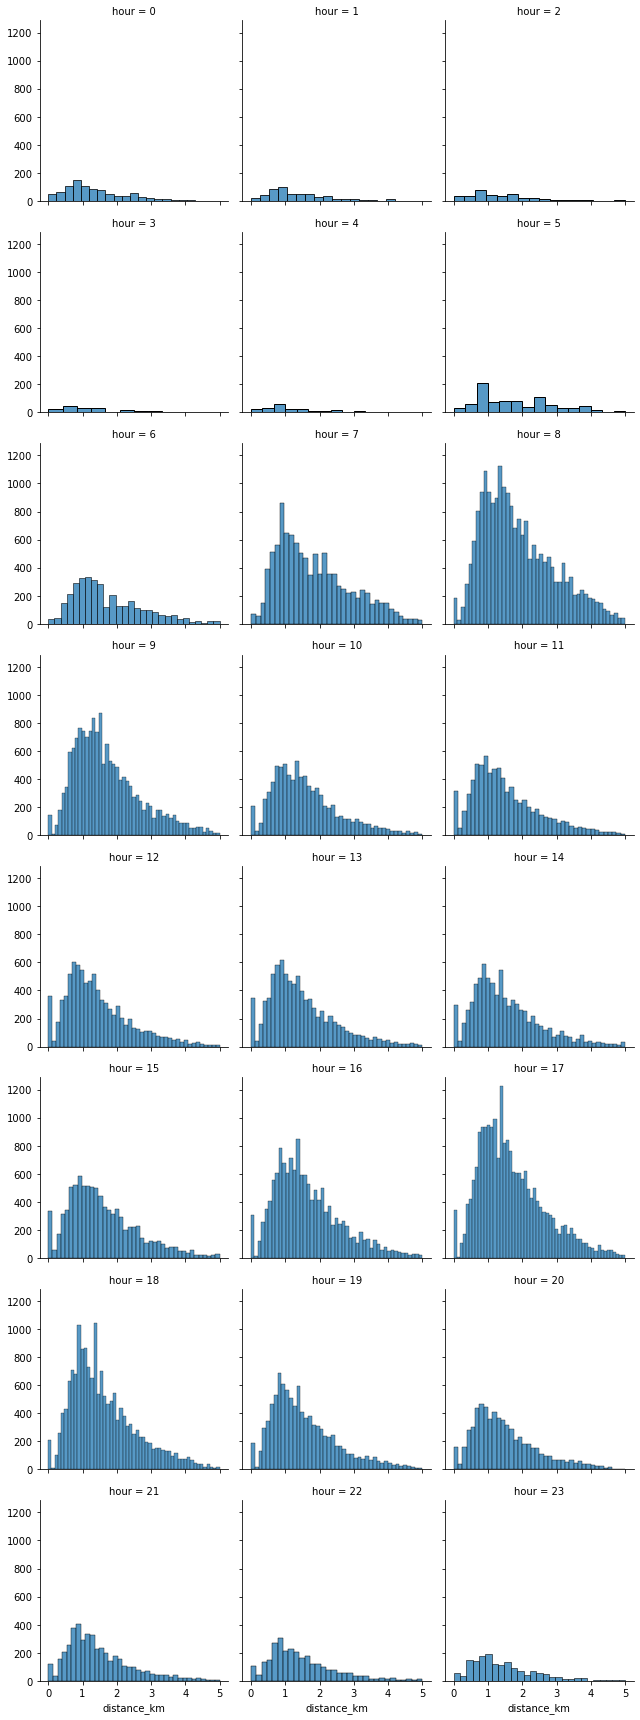

In [13]:
g = sb.FacetGrid(data=go, col='hour', col_wrap=3, height=3)
g.map(sb.histplot, 'distance_km', binrange=(0,5))

In [14]:
# This cell orders the days as categorical values instead of integers. 
# This is to print the days in chronological order instead of most to least.
day_ord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
day_cat = pd.api.types.CategoricalDtype(ordered=True, categories=day_ord)
go['day'] = go['day'].astype(day_cat);

### Ride count for each day of the year.
With the spikes in usage around the common commuting hours, I began to expect that there is a greater volume of rides on weekdays. My next step is to look at the distribution of rides over the month

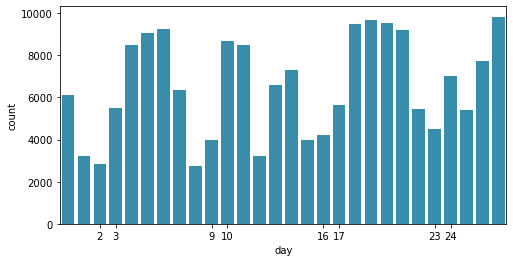

In [15]:
plt.figure(figsize=(8, 4))
ticks = [2, 3, 9, 10, 16, 17, 23, 24]
labels = [i for i in ticks]
sb.countplot(data=go, x='day', color='#2596be')
plt.xticks(ticks, labels);

### Ride Count by Weekday
To continue the exploration of bike use by day I created a histogram of bike use for each day of the week. It is obvious here that bike use is down significantly on weekends. 

In [16]:
go['weekday'] = go['start_time'].dt.weekday

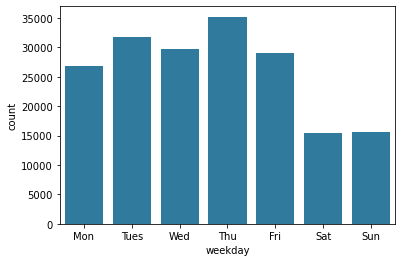

In [17]:
ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=go, x='weekday', color='#1e81b0')
plt.xticks(ticks, labels);

### Comparing bike use for each day of the week.
This clearly shows the difference between bike use on the weekend vs. the week day. Weekdays have a bimodal spread while weekends have unimodal spread with a much more even distribution.

In [18]:
go_wkend = go.query('weekday ==5 or weekday ==6')

In [19]:
go_wkday = go.query('weekday !=5 or weekday !=6')

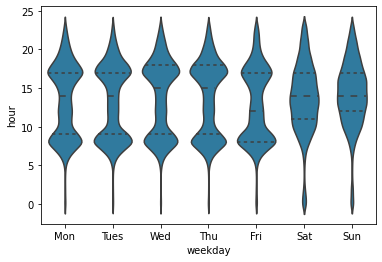

In [20]:
ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.violinplot(data=go, y='hour', x='weekday', color='#1e81b0', inner='quartile')
plt.xticks(ticks, labels);

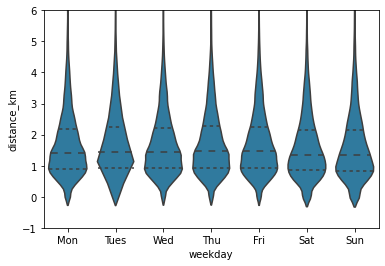

In [21]:
ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.violinplot(data=go, y='distance_km', x='weekday', color='#1e81b0', inner='quartile')
plt.xticks(ticks, labels)
plt.ylim(bottom=-1, top=6);

## Individual Bike Use

### Average distance traveled by each bike
All bikes are used about the same on average. it is at around 1.5. I would guess that outliers are ridden far less than those in the range of 1-2km.

(0.0, 5.0)

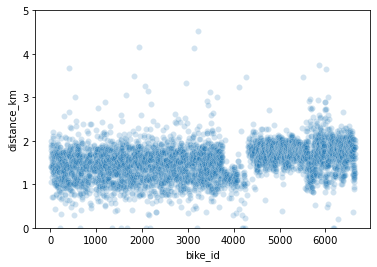

In [22]:
# create dataframe of means grouped by bike id
by_bike = go.groupby(['bike_id']).mean()
by_bike.head()

sb.scatterplot(data=by_bike, x='bike_id', y='distance_km', alpha=0.2)
plt.ylim(bottom=0, top=5)

### Total distance traveled by each bike
Most bikes traveled less than 100km, but bikes numbered between 4500 and 5500 traveled much more. Based on later findings it seems that it is not the location of the bikes that matter, so those bikes might be a different type that riders prefer.

In [23]:
# create dataframe of sums grouped by bike id
bike_sum = go.groupby(['bike_id']).sum()
bike_sum.head()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,hour,distance_km,weekday
bike_id,,,,,,,,,,,
11,26233,3846.0,1473.215106,-4774.121610,3747.0,1473.289165,-4774.010943,63462.0,478,72.529297,121
12,14901,5596.0,908.626417,-2934.354819,5602.0,908.592047,-2934.392033,43728.0,334,34.405209,79
13,6719,1901.0,378.523557,-1222.589252,2288.0,378.496293,-1222.589982,19825.0,117,18.997264,12
14,10084,4442.0,719.337963,-2323.004681,4420.0,719.283809,-2323.081724,37749.0,296,26.487845,60
15,6234,2058.0,340.627677,-1100.386483,1754.0,340.574614,-1100.401710,17835.0,95,18.066226,32


(0.0, 347.85063394310845)

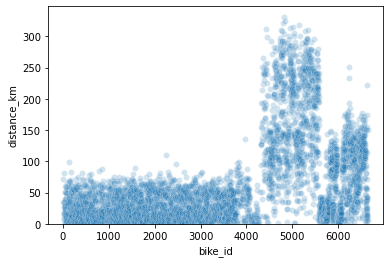

In [24]:
sb.scatterplot(data=bike_sum, x='bike_id', y='distance_km', alpha=0.2)
plt.ylim(bottom=0)

In [25]:
start_loc = go[['start_station_latitude', 'start_station_longitude']]
end_loc = go[['end_station_latitude', 'end_station_longitude']]


## Start Location heat maps

### All trips Start Points

In [26]:
# Creating df for all bikes excluding those between 4500 and 5500
rest_of_bikes = go.query('bike_id < 4500 or bike_id > 5500')
start_loc_rest = rest_of_bikes[['start_station_latitude', 'start_station_longitude']]
end_loc_rest = rest_of_bikes[['end_station_latitude', 'end_station_longitude']]

In [27]:

gmaps.configure(api_key='your-key-here')
locations = start_loc_rest
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, center=(37.63, -122.22), zoom_level= 9)
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

## 4500 - 5500 start points

In [28]:
# Creating df for start and end locations for only bikes 4500 - 5500
long_dist_bikes = go.query('4500 <= bike_id <= 5500')
start_locations = long_dist_bikes[['start_station_latitude', 'start_station_longitude']]
end_locations = long_dist_bikes[['end_station_latitude', 'end_station_longitude']]

In [29]:

figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, center=(37.63, -122.22), zoom_level= 9)
fig.add_layer(gmaps.heatmap_layer(start_locations))
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

### All trip end points

In [30]:
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, center=(37.63, -122.22), zoom_level= 9)
fig.add_layer(gmaps.heatmap_layer(end_loc_rest))
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

## Only Bikes 4500-5500 end points

In [31]:
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

fig = gmaps.figure(layout=figure_layout, center=(37.63, -122.22), zoom_level= 9)
fig.add_layer(gmaps.heatmap_layer(end_locations))
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))


Two things that stand out when compairing the two groups of bikes. First, that no bikes from 4500 to 5500 are in San Jose. and second, Bikes in the 4500 to 5500 range end in the UC Berkeley area. They are most likely commuter bikes for students. 